# IMPORT DATA  
  
### The following sets of methods are used to convert a sets of file into an array of Networkx OBJ.

The main method, called "import_data", takes as input a folder ( according to the specific of Benchmark Data Sets for Graph Kernels from "technische universitat dortmund" --> link: https://ls11-www.cs.tu-dortmund.de/staff/morris/graphkerneldatasets) and the number of graphs.

### Import libraries

In [16]:
import networkx as nx
import numpy as np
import os
import re
import pydot


### Define methods

In [8]:
def import_data(folder_name,N):
    info={}
    files = os.listdir(folder_name)
    for f in files:
        m = re.search("([a-zA-Z]*_)(\w*)(.txt)", f)
        if(type(m)== re.Match):
            info[m.group(2)]=1

    #####(folder_name+"\\"+folder_name+"_"+f+".txt")



    path_A =folder_name+"\\"+folder_name+"_A.txt"
    path_graph_indicator =folder_name+"\\"+folder_name+"_graph_indicator.txt"



    AA = A_GI(path_A, path_graph_indicator,N) 


    ### create an array for the node attributes
    if(info.get("node_attributes")==1):
        path_node_attributes = folder_name+"\\"+folder_name+"_node_attributes.txt"
        file = open(path_node_attributes, "r") 
        nodes_attribute=[]
        for t in file:
            tmp=t.split(',')
            tmp = [float(x.strip()) for x in tmp]
            nodes_attribute.append(tmp)
        file.close()
    ### create a set for the node labels
    if(info.get("node_labels")==1):
        path_node_label = folder_name+"\\"+folder_name+"_node_labels.txt"
        file = open(path_node_label, "r") 
        mapping = {}
        c=1
        for t in file:
            mapping[c]=t.rstrip()
            c=c+1
        file.close()


    ### create an array for the edge labels
    if(info.get("edge_labels")==1):
        path_edge_label = folder_name+"\\"+folder_name+"_edge_labels.txt"
        file = open(path_edge_label, "r")
        mapping_edge = []

        for t in file:
            mapping_edge.append(t.rstrip())
            c=c+1
        file.close()



    graphs=[]
    k=0
    count_edge = 0
    for edges in AA:

        G = nx.Graph()

        if(info.get("edge_labels")==1):
            # for each edge in edges, add the edge and the label to the graph
            for e in edges:
                G.add_edge(e[0],e[1],label=mapping_edge[count_edge-1])
                count_edge = count_edge + 1
        else:
            G.add_edges_from(edges)



        if(info.get("node_attributes")==1 and info.get("node_labels")==1):
            for a in G.nodes():
                G.add_node(a, label=mapping[a],vec=nodes_attribute[k])
                k = k + 1
        elif(info.get("node_labels")==1):
            for a in G.nodes():
                G.add_node(a, label=mapping[a])

        elif(info.get("node_attributes")==1):
            for a in G.nodes():
                G.add_node(a,vec=nodes_attribute[k])
                k = k + 1


        graphs.append(G)

    return(graphs)



# only file A and file graph_indicator
def A_GI(path_A, path_graph_indicator,N):
    AA=[]

    # count number of nodes for each graphs
    file = open(path_graph_indicator, "r") 
    
    graph_nodes=np.zeros(N)
    for t in file:
        graph_nodes[int(t)-1]=graph_nodes[int(t)-1]+1
    file.close()


    # create array of pairs of nodes
    file = open(path_A, "r") 
    nodes_pair=[]


    for t in file:
        t=t.split(",")
        pairs = [ int(x) for x in t ]
        nodes_pair.append(pairs)
    file.close()



    cum_graph_nodes=np.cumsum(graph_nodes)


    previous=0
    for i in  cum_graph_nodes:
        graph=[]
        for j in nodes_pair:
            if(previous<=j[0]<=i and previous<=j[1]<=i):
                graph.append(j)
        AA.append(graph)
        previous=i
    
    return AA

### Usage:
To use "import data" you must specify the folder name and the number of graphs  
The imported graph is printed using EDeN method

In [9]:
graphs=import_data("MIO",3)


from eden.display import serialize_graph
print (serialize_graph(graphs[0]))

{
    "directed":false,
    "multigraph":false,
    "graph":{},
    "nodes":[
        {
            "label":"1",
            "id":1
        },
        {
            "label":"2",
            "id":2
        },
        {
            "label":"1",
            "id":3
        },
        {
            "label":"2",
            "id":4
        }
    ],
    "links":[
        {
            "label":"1",
            "source":1,
            "target":2
        },
        {
            "label":"3",
            "source":1,
            "target":4
        },
        {
            "label":"2",
            "source":2,
            "target":3
        }
    ]
}


### Using EDeN the labeled graph is plotted

C:\Users\longa\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


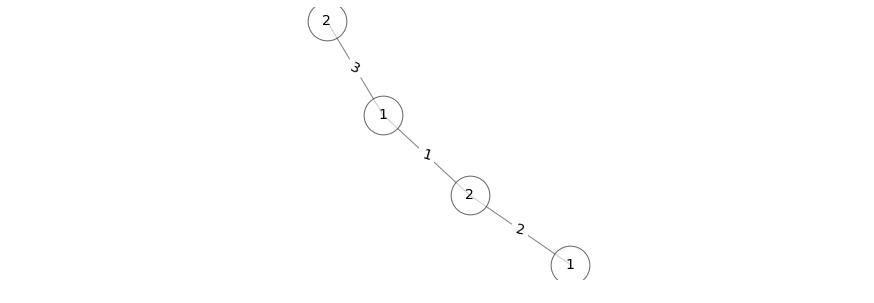

In [15]:
from eden.display import draw_graph
draw_graph(graphs[0],  size=15, vertex_size=1500, font_size=14, vertex_border=True, size_x_to_y_ratio=3)
